Acquisition and Analysis of Neural Data 

Exercise 01

Bramantyo Ibrahim Supriyatno

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
max_t = 4
del_t = 1e-3
sr = int(1./del_t)

# 1. Firing Rate Estimation and Convolution

## (a)

In [3]:
spike1 = np.loadtxt('ExampleSpikeTimes1.dat')/1000

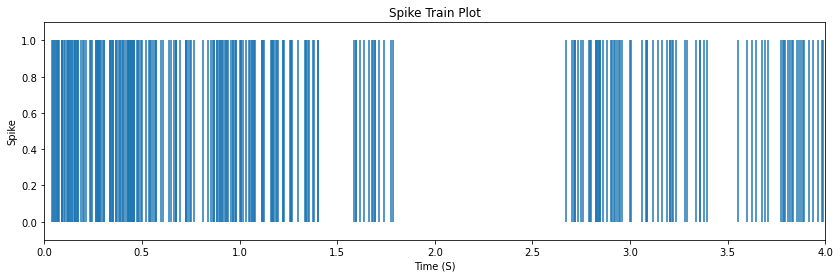

In [4]:
plt.figure(figsize=(14,4))
plt.eventplot(spike1, lineoffsets=0.5 )

plt.title('Spike Train Plot')

plt.xlabel('Time (S)')
plt.ylabel('Spike')
plt.xlim(0, 4)
plt.ylim(-0.1, 1.1)
plt.show()

## (b)

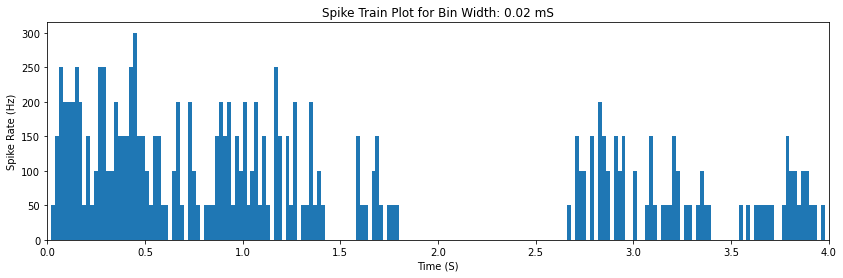

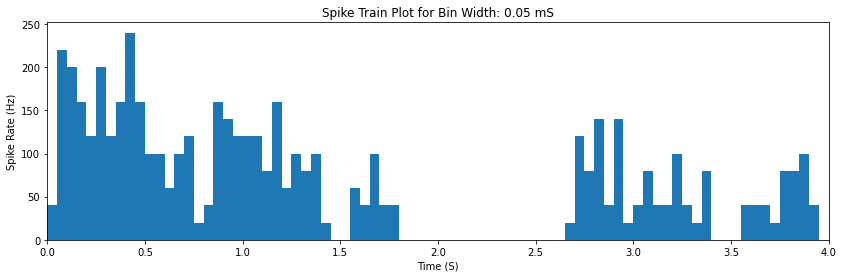

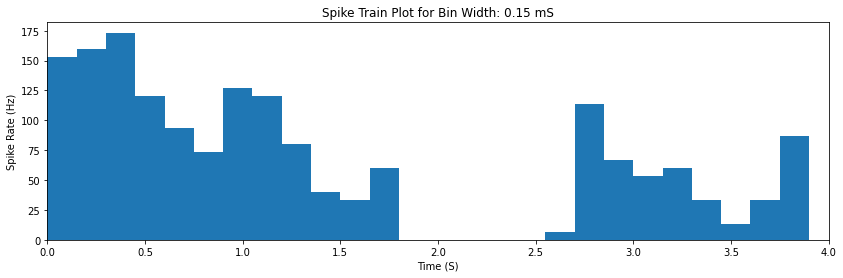

In [5]:
del_ts = [0.02, 0.05, 0.15]

for del_t in del_ts:
    plt.figure(figsize=(14,4))
    bins = np.arange(0, 4, del_t)
    plt.hist(spike1, bins, weights=np.full(spike1.shape, 1/del_t))

    plt.title('Spike Train Plot for Bin Width: {} mS'.format(str(del_t)))

    plt.xlabel('Time (S)')
    plt.ylabel('Spike Rate (Hz)')
    plt.xlim(0, 4)
    plt.show()

## (c)

In [12]:
spike_idx = np.array(spike1 * sr, dtype=int)
spike_samples = np.zeros(int(max_t * sr))
spike_samples[spike_idx] = 1

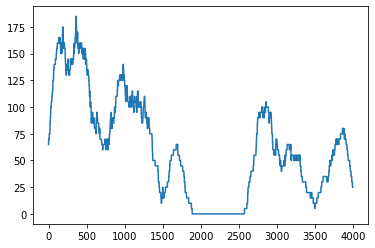

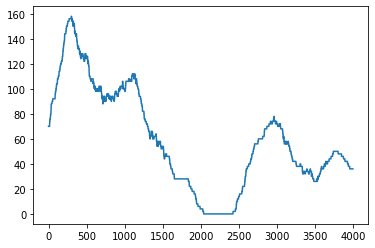

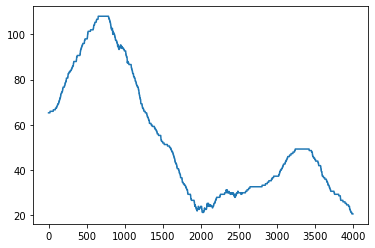

In [13]:
kernel_del_t = [20e-2, 50e-2, 150e-2]
rect_convolved = []

for kdel_t in kernel_del_t:
    rect_kernel =  np.full(int(kdel_t*sr), 1./kdel_t)
    rect_convolved = np.convolve(spike_samples, rect_kernel, mode='same')
    plt.plot(rect_convolved)
    plt.show()

In [14]:
def get_gaussian(max_t, sr, sigma):
    t = np.arange(-max_t*0.5, max_t*0.5, step =1/sr)
    g_kernel = np.exp(-(t*t)/(2 * (sigma**2)))
    return g_kernel/(np.sqrt(2*np.pi)*sigma)

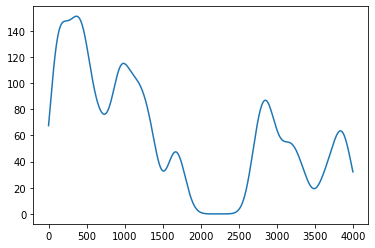

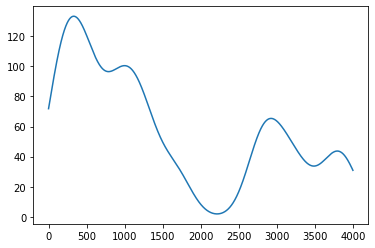

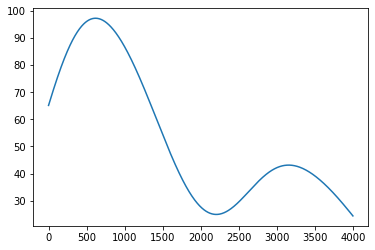

In [30]:
kernel_del_t = [10e-2, 20e-2, 50e-2]
for kdel_t in kernel_del_t:
    gaus_kernel =  get_gaussian(max_t, sr, kdel_t)
    gaus_convolved = np.convolve(spike_samples, gaus_kernel, mode='same')
    plt.plot(gaus_convolved)
    plt.show()

In [31]:
def get_alpha_function(max_t, sr, one_alpha):
    t = np.arange(-max_t*0.5, max_t*0.5, step =1/sr)
    alpha = 1./one_alpha
    w = alpha*alpha*t * np.exp(-alpha*t)
    w = np.clip(w, a_min=0, a_max=None)
    return w

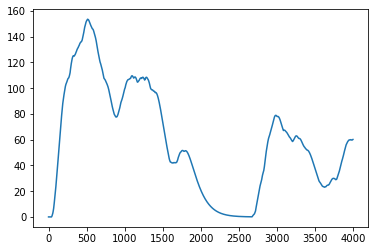

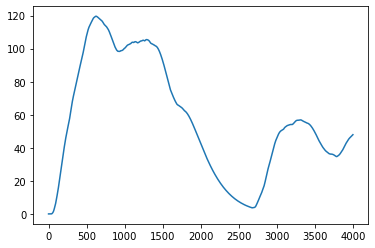

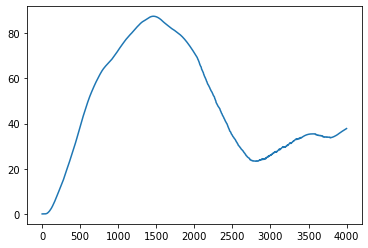

In [32]:
for kdel_t in kernel_del_t:
    alpha_kernel =  get_alpha_function(max_t, sr, kdel_t)
    alpha_convolved = np.convolve(spike_samples, alpha_kernel, mode='same')
    plt.plot(alpha_convolved)
    plt.show()

## (d)

In [34]:
r = np.sum(spike1) / max_t
print('spike count rate: {} spikes/second'.format(r))

spike count rate: 94.1379 spikes/second
